# Looking at data with Jupyter

What we cover today:
1. Running shell commands in jupyter
2. Importing data and looking at it: descriptive statistics and frequencies
3. Note on data cleansing
4. Plotting data with Seaborn ([docs](https://seaborn.pydata.org/))
5. ipywidgets ([docs](https://ipywidgets.readthedocs.io/en/latest/))

# A quick analysis of kickstarter projects
We look at a dataset of kickstarter project and we want to answer a few questions about it:
1. What are the most frequent categories?
2. How is the success rate per category?
3. Are there projects which exhibit a particular pattern of backers vs pledge?
4. Create a simple dashboard of category frequency for a selected country

## Use jupyter as a shell to see what we have

Before importing the data we quickly look at it to get a sense of the format and see if there is a header.
We also want to know how big the file is and how many lines it has before loading in memory.

In [ ]:
#ls -lh ks*

In [31]:
! head "ks-projects-201612.csv"

ID ,name ,category ,main_category ,currency ,deadline ,goal ,launched ,pledged ,state ,backers ,country ,usd pledged ,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,,,,
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,,,,
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,,,,
1000011046,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,,,,
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,,,,
1000023410,Support Solar Roasted Coffee & Green Energy!  SolarCoffee.co,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205,,,,
10000305

In [32]:
! wc -l ks-projects-201612.csv

  323751 ks-projects-201612.csv


## Reading the file

Encoding or other errors might happen. Errors can be handled in different ways (fail, ignore, replace, etc). See the documentation for refefence: https://docs.python.org/3/library/functions.html#open

In [33]:
import pandas as pd

ks = pd.read_csv("ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte

In [34]:
b'\x99'.decode('Windows-1252')

'™'

Data is from https://www.kaggle.com/kemical/kickstarter-projects

In [35]:
import ftfy
ftfy.guess_bytes(b'\x99')

('™', 'sloppy-windows-1252')

## Importing the data and getting the columns

We import the data and check the values for columns without a name.

In [36]:
ks = pd.read_csv("ks-projects-201612.csv", encoding="windows-1252")
ks

/var/folders/pb/6p4nt4yj54v_p4hsxv93b_3h0000gn/T/ipykernel_91838/45342146.py:1: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  ks = pd.read_csv("ks-projects-201612.csv", encoding="windows-1252")


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,NaN,NaN,NaN,NaN
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,NaN,NaN,NaN,NaN
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,NaN,NaN,NaN,NaN
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,NaN,NaN,NaN,NaN


In [37]:
ks = ks.rename(columns = lambda x : x.rstrip())
ks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,NaN,NaN,NaN,NaN
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,NaN,NaN,NaN,NaN
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,NaN,NaN,NaN,NaN
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,NaN,NaN,NaN,NaN


In [38]:
cols = [f"Unnamed: {i}" for i in range(13,17)]
pd.concat([ks[col] for col in cols]).value_counts()

0                70
0.0              34
1                11
US               11
25.0              9
                 ..
5746.54531605     1
208               1
1400              1
0.75115847        1
9854.0            1
Name: count, Length: 441, dtype: int64

In [39]:
! grep "5746.54531605" ks-projects-201612.csv

161920117,The Fastest LCD-tint changing Sunglasses, CTRL XC,Wearables,Technology,EUR,2016-10-14 14:01:56,5000,2016-09-14 14:01:56,24780,successful,168,NL,5746.54531605,,,


How can we fix it? We can apply some heuristics exploiting the rest of the structure of the row, as for example the fact that category has a limited number of values, same for subcatory and currency; we can also exploit the fact that some columns are numbers and/or date.

In [40]:
bad_backers = ks.backers.apply(lambda x: not x.isdigit())
ks.backers[bad_backers]

1454          failed
1563          failed
1794          failed
1931          failed
2420      successful
             ...    
321945        failed
322162        failed
322204        failed
323138    successful
323495    successful
Name: backers, Length: 624, dtype: object

In [41]:
ks.backers[bad_backers].value_counts()

backers
failed                 378
successful             164
canceled                60
live                    11
undefined                7
2012-06-06 23:54:14      1
2015-07-03 18:23:23      1
2014-02-05 02:06:20      1
88619.2                  1
Name: count, dtype: int64

In [42]:
ks[bad_backers]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321945,989007729,THROUGH MY EYES,MY LIFE IN THE MISSISSIPPI DELTA,Narrative Film,Film & Video,USD,2012-04-05 02:34:49,3500,2012-03-06 02:34:49,10,failed,1,US,10,NaN,NaN,NaN
322162,990511774,Daniel Hresko's new CD is (almost) ready,so get on board!,Indie Rock,Music,USD,2011-09-06 05:59:00,400,2011-08-06 15:36:39,61,failed,4,US,61,NaN,NaN,NaN
322204,990746749,Feet on the Ground,Head in the Clouds,Film & Video,Film & Video,USD,2013-04-17 16:00:31,35000,2013-03-18 15:00:31,179,failed,10,US,179,NaN,NaN,NaN
323138,996542939,'WANDER' - Apocalyptic Short Film,Post Production,Shorts,Film & Video,GBP,2015-04-26 17:12:59,1500,2015-02-25 17:12:59,2501,successful,50,GB,3861.84447014,NaN,NaN,NaN


<Axes: xlabel='main_category'>

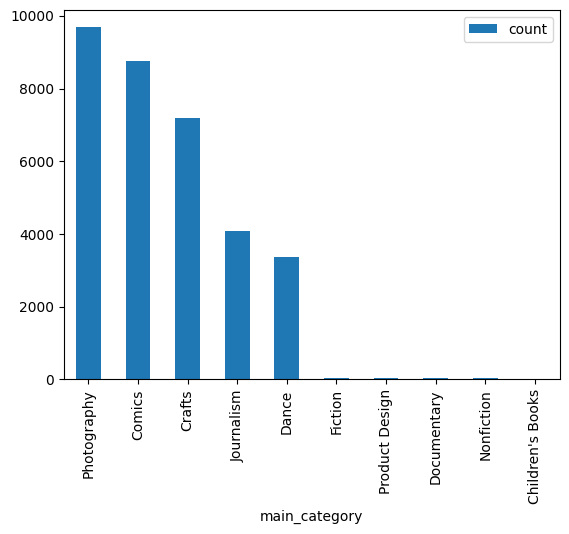

In [43]:
pd.DataFrame(ks.main_category.value_counts()).head(20).tail(10).plot(kind="bar")

In [44]:
pd.DataFrame(ks.main_category.value_counts()).head(20).reset_index()

,main_category,count
0,Film & Video,57679
1,Music,46744
2,Publishing,34233
3,Games,28008
4,Technology,26128
5,Art,23975
6,Design,23872
7,Food,21229
8,Fashion,18398
9,Theater,9972


In [45]:
cfreq = ks.category.value_counts()
cfreq[:20]

category
Product Design      17477
Documentary         14891
Music               13907
Shorts              11681
Tabletop Games      10708
Food                10533
Video Games         10059
Film & Video         9207
Fiction              8231
Fashion              7910
Nonfiction           7404
Art                  6894
Theater              6833
Rock                 6345
Technology           5762
Children's Books     5651
Photography          5510
Apparel              5478
Indie Rock           5372
Webseries            5347
Name: count, dtype: int64

In [46]:
main_cat_freq = ks.main_category.value_counts()
good_category = main_cat_freq[:15].index.values

In [47]:
ks_bad_rows = ks[~ks.main_category.isin(good_category)]
ks_bad_rows

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN
3079,1018515072,The Secret Lives of Baba Segi's Wives,A Workshop Production,Plays,Theater,GBP,2015-12-14 01:00:00,3000,2015-11-15 14:29:36,3273,successful,46,GB,4986.41798748,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321307,985310209,Summoned Games,The store you've been looking for,Tabletop Games,Games,GBP,2016-10-21 23:08:34,35000,2016-09-21 23:08:34,296,failed,7,GB,130.443914,NaN,NaN,NaN
321365,985600912,SteamGirl Tarot,Major Arcana,Illustration,Art,GBP,2015-11-08 20:16:46,5000,2015-10-09 20:16:46,0,failed,0,GB,0,NaN,NaN,NaN
321945,989007729,THROUGH MY EYES,MY LIFE IN THE MISSISSIPPI DELTA,Narrative Film,Film & Video,USD,2012-04-05 02:34:49,3500,2012-03-06 02:34:49,10,failed,1,US,10,NaN,NaN,NaN
322162,990511774,Daniel Hresko's new CD is (almost) ready,so get on board!,Indie Rock,Music,USD,2011-09-06 05:59:00,400,2011-08-06 15:36:39,61,failed,4,US,61,NaN,NaN,NaN


# A note on data cleansing

Data quality dimensions:
- accuracy: difficult to measure, often require domain knowledge. Looking at distributions helps
- completeness: difficult to measure, importance depend on the context
- Consistency
- Uniqueness
- Timeliness

There is the ** garbage in, garbage out principle** but the worst case is when data is wrong but looks reasonable.

## Definition

Data cleansing: detect & correct/remove bad records from a dataset.

In practice: detect incomplete, incorrect, inaccurate, partial or irrelevant data points and, depending on the situation and use case, replace, modify, fill in or delete this dirty data points.

## Steps

- Parse
- Correct
- Standardize
- Match
- Consolidate


## Openrefine

A useful tool for data cleansing is open refine: https://github.com/OpenRefine/OpenRefine


# Plotting the data with Seaborn

Seaborn is a python visualization library built on top of matplotlib, which provides a set of APIs that reduce the boilerplate required to produce matplotlib visualizations.

https://seaborn.pydata.org/


## Looking at the distribution of project categories

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", context="talk")
%config InlineBackend.figure_format = 'retina'

Creating a count plot of occurences can be done directly, without data manipulation

<Axes: xlabel='main_category'>

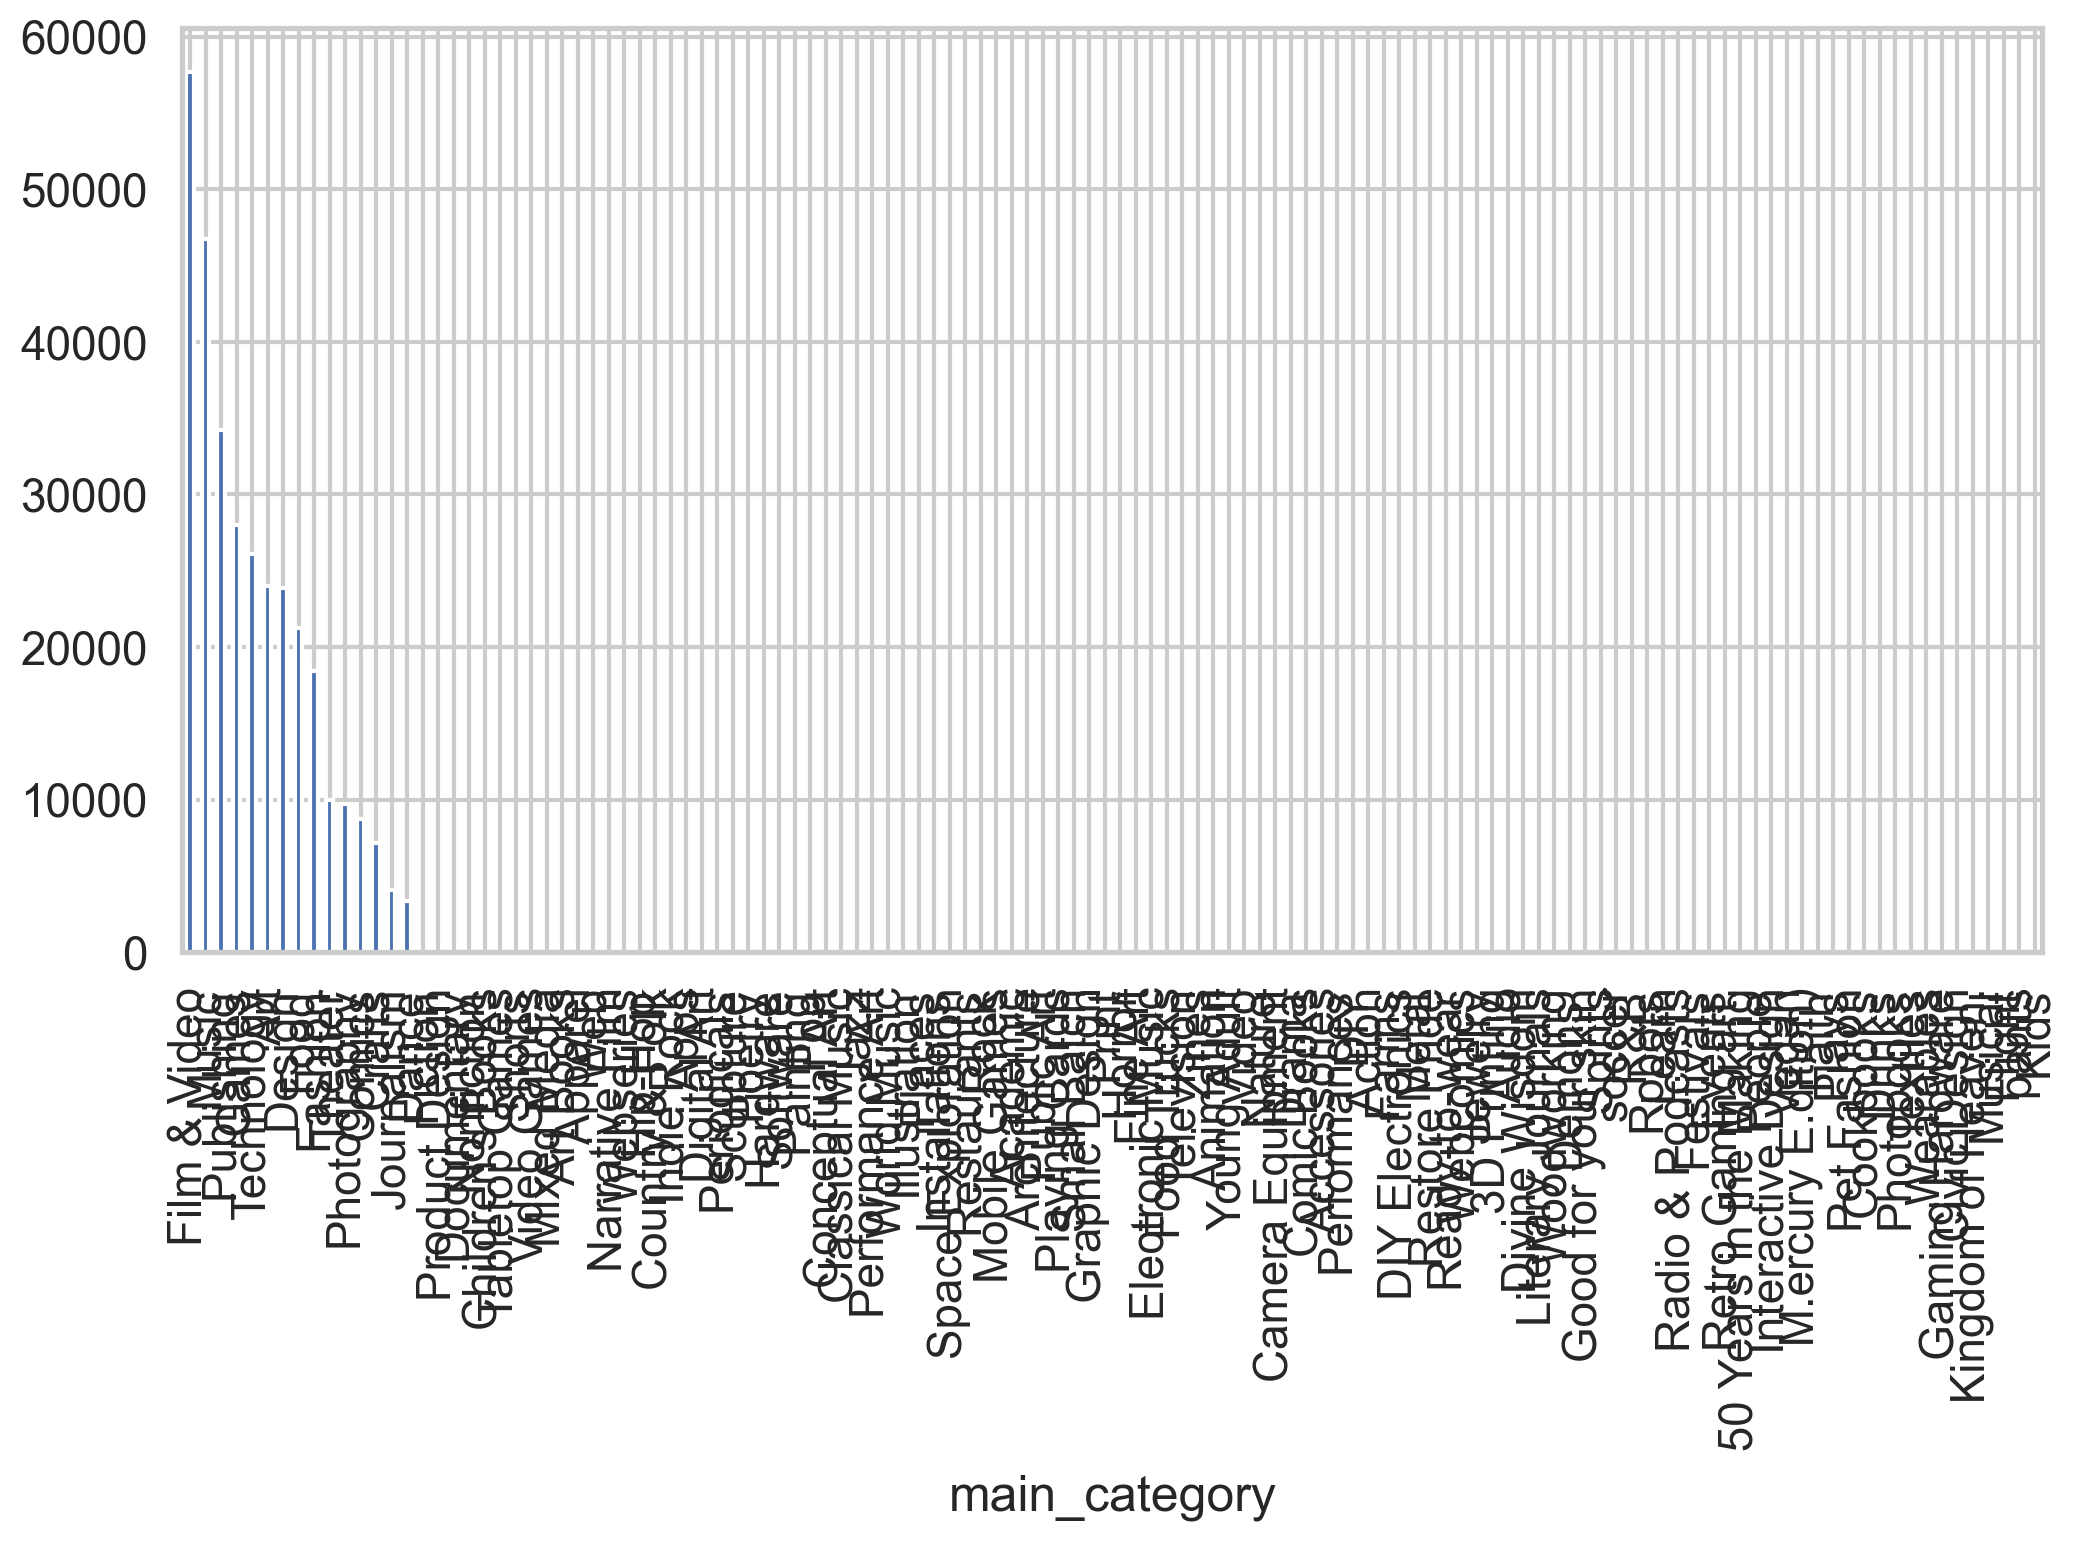

In [49]:
plt.subplots(figsize=(12,6))
# sns.countplot(x=ks.main_category);
ks.main_category.value_counts().plot(kind="bar")

See the [matplotlib documentation](https://matplotlib.org/stable/) for more details.

### Filtering out categories with low frequency

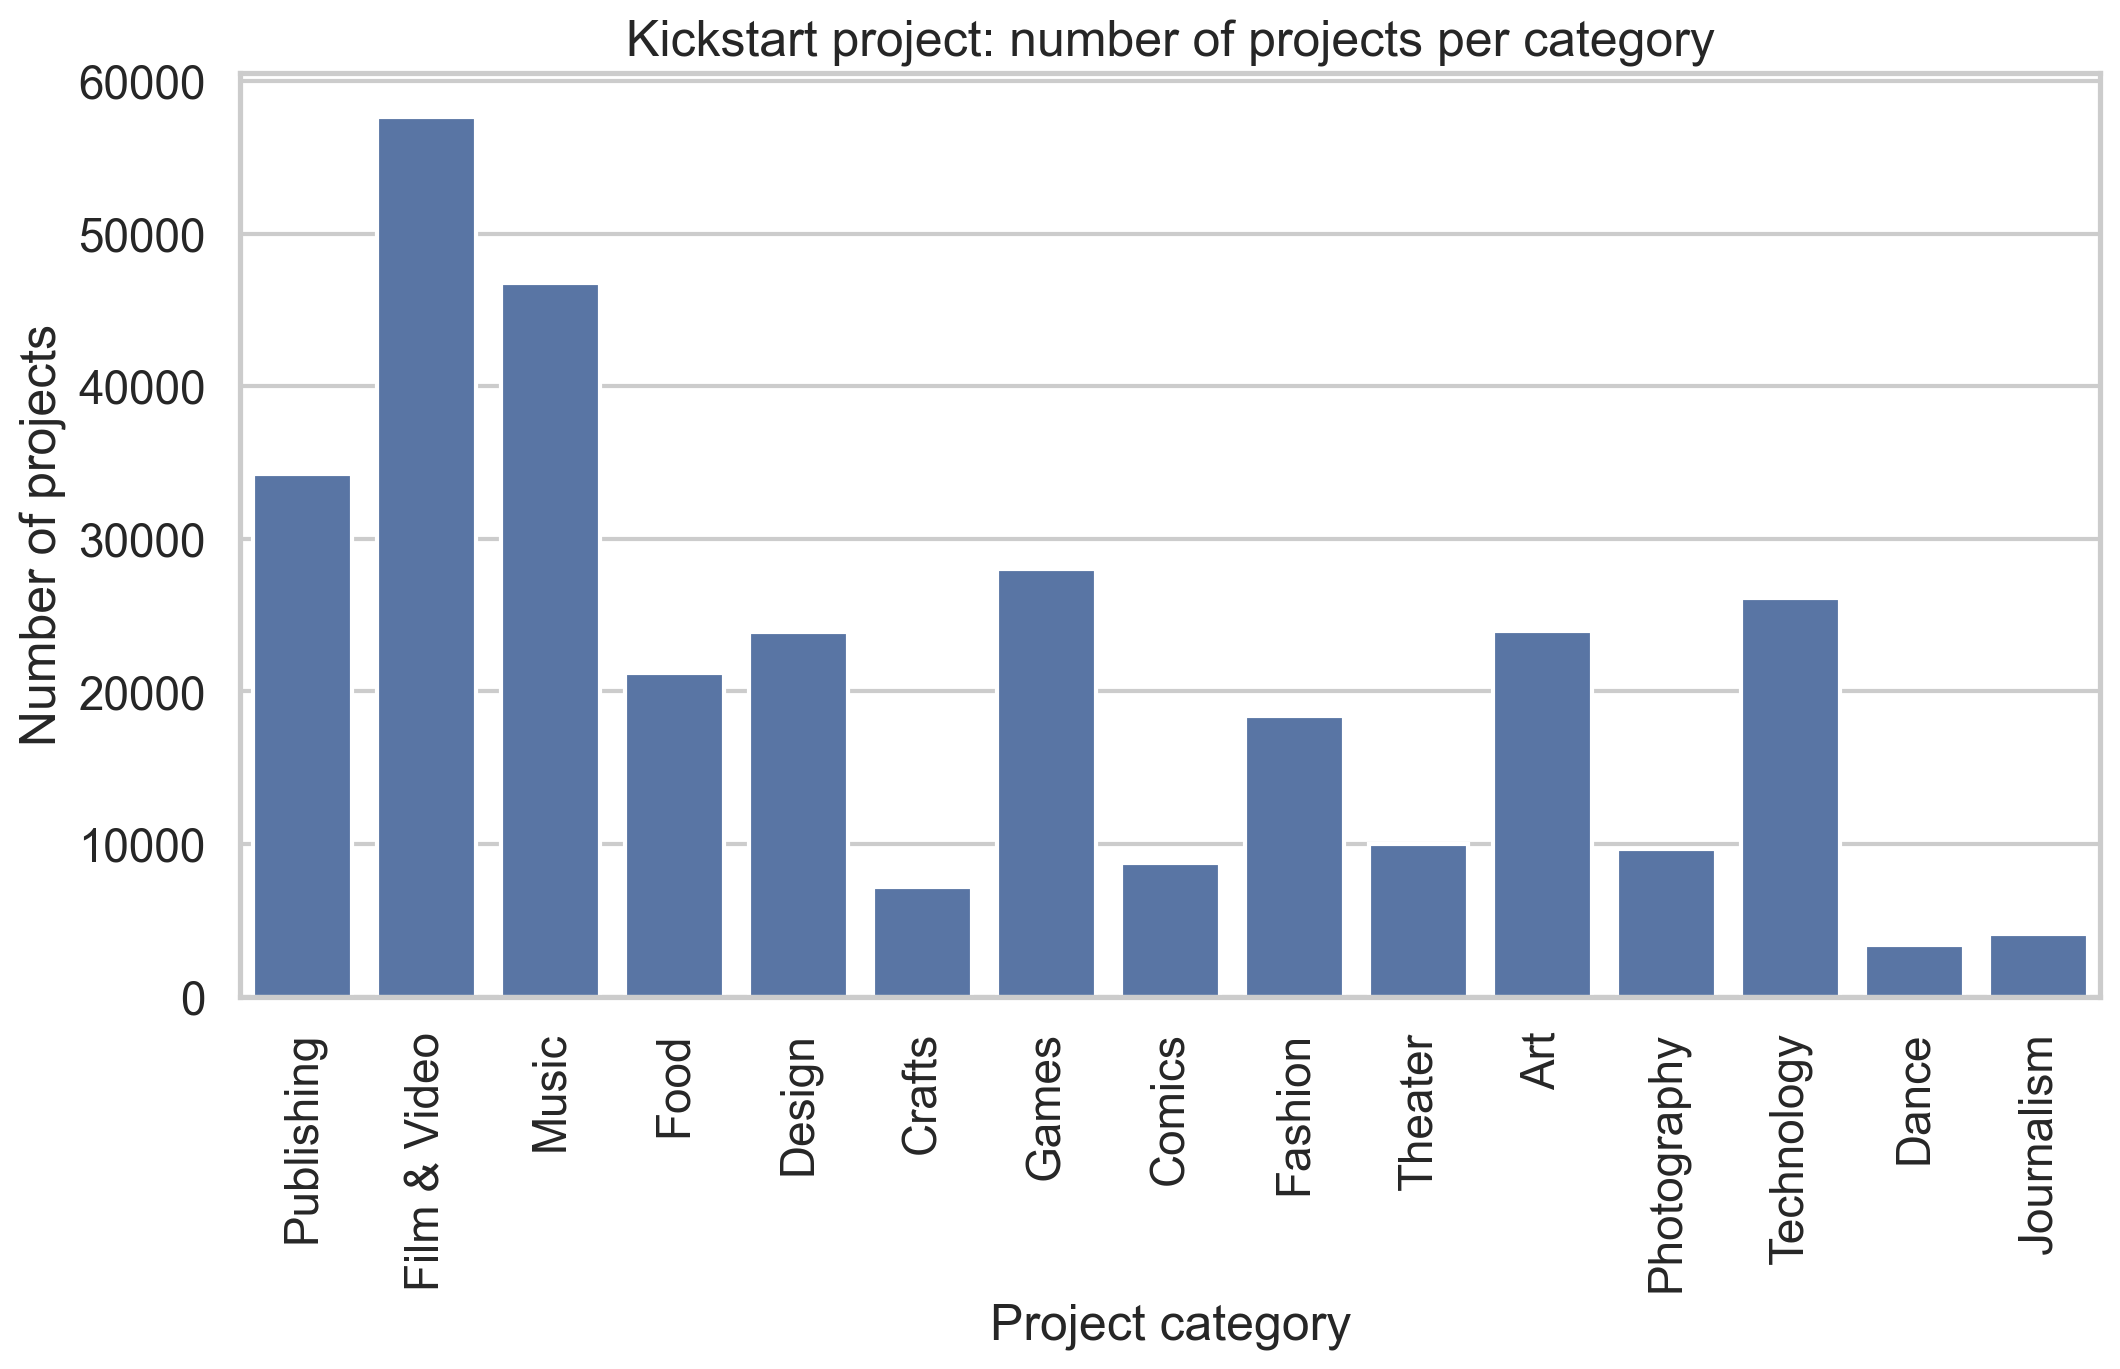

In [50]:
main_category_good = ks[ks.main_category.isin(good_category)].main_category
plt.subplots(figsize=(12,6))
plot = sns.countplot(x=main_category_good);
plt.xticks(rotation=90)
plt.title("Kickstart project: number of projects per category")
plt.xlabel("Project category");
plt.ylabel("Number of projects");

Let's make it more useful by sorting the data (from nominal comparison to ranking)

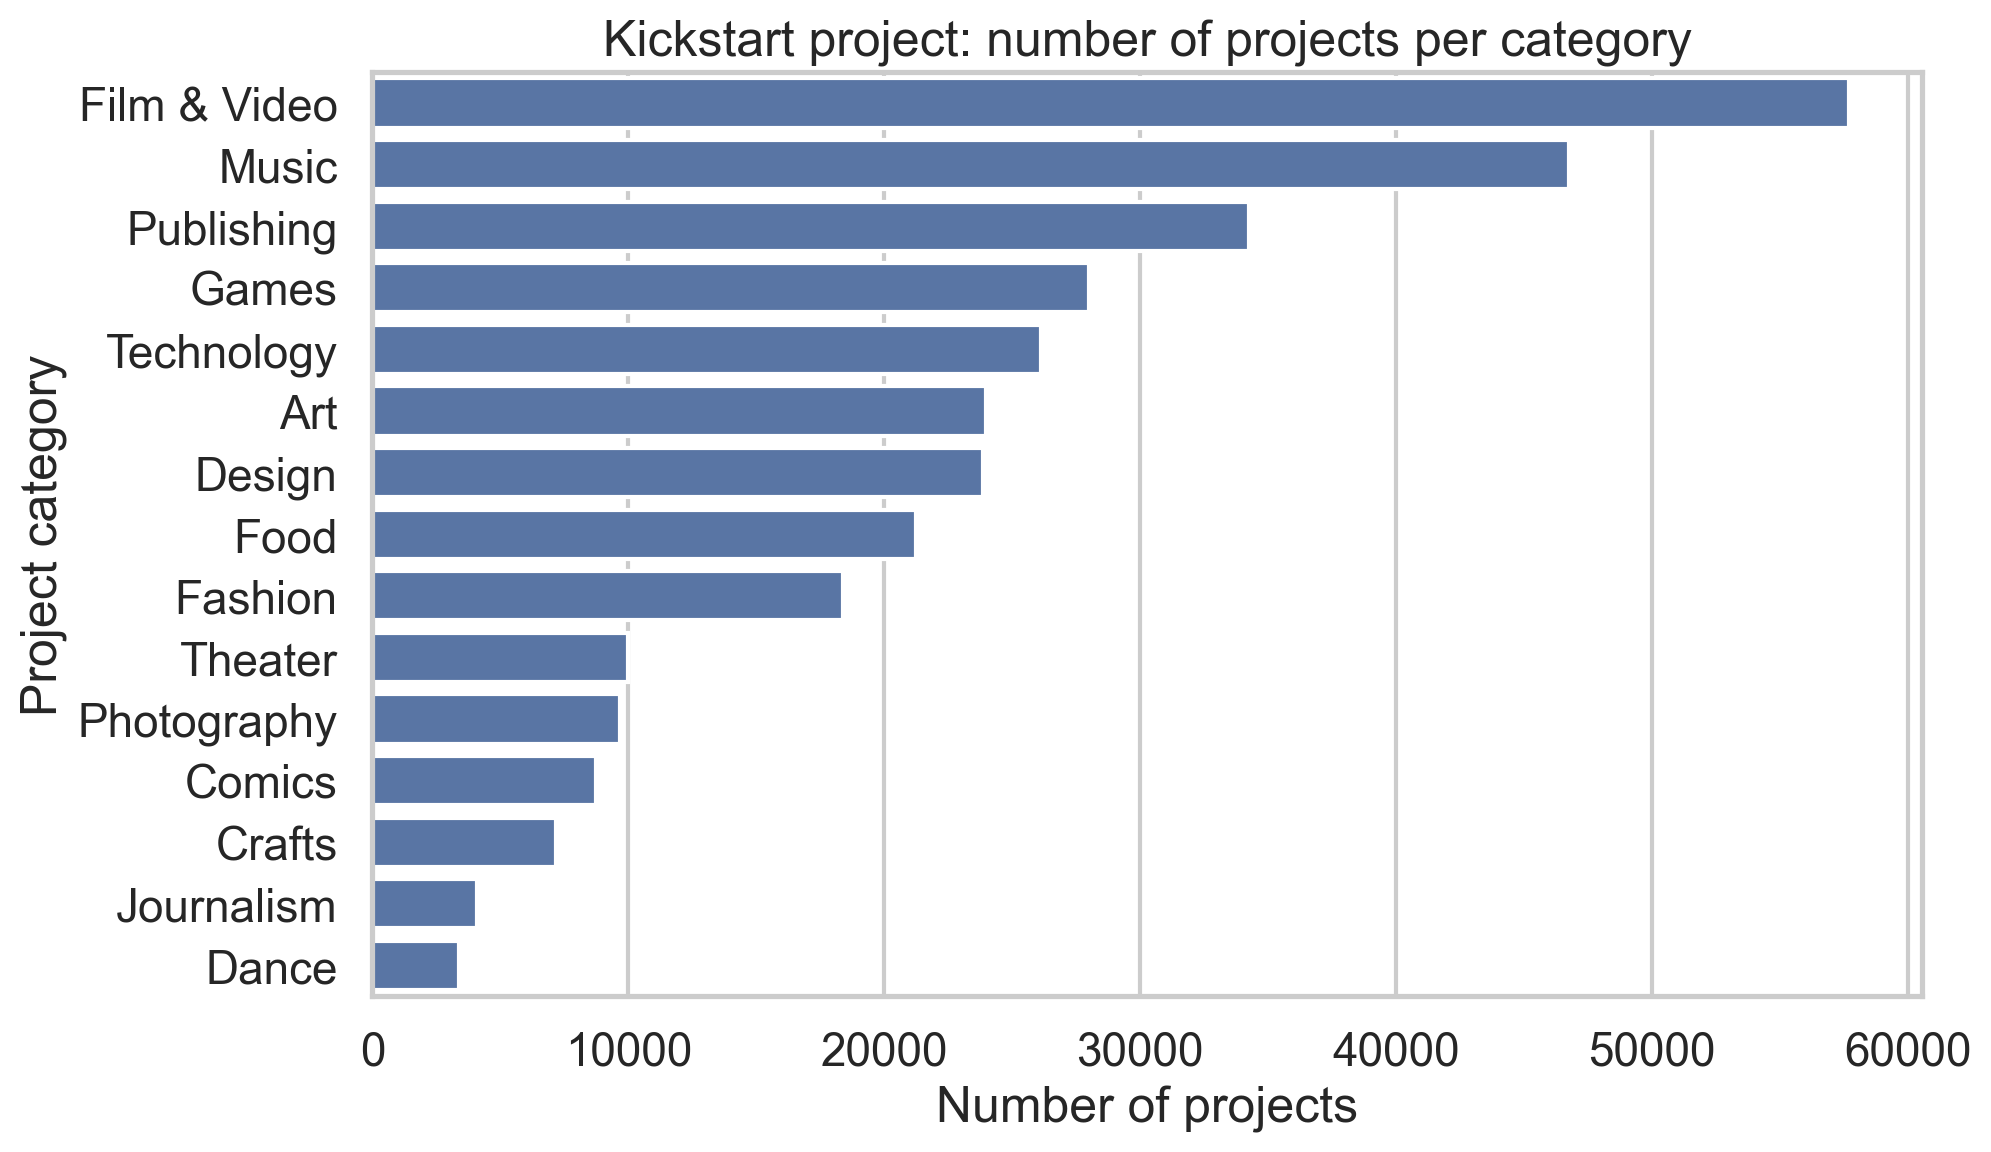

In [51]:
plt.subplots(figsize=(10,6))
sorted_categories = ks[ks.main_category.isin(good_category)].main_category.value_counts()
plot = sns.barplot(x=sorted_categories, y=sorted_categories.index)
plt.title("Kickstart project: number of projects per category")
plt.ylabel("Project category");
plt.xlabel("Number of projects");

### Looking at success rate per category

In [52]:
ks.state.value_counts().head(10).reset_index()
good_states = ks.state.value_counts()[:6].index.values

Looks like the state column is dirty for a number of project. Let's keep only the projects with a state we consider valid and store the others elsewhere in case we want to dig further on why the data is dirty.

In [53]:
ks_clean_state = ks[ks.state.isin(good_states)]
ks_clean_state

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,NaN,NaN,NaN,NaN
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,NaN,NaN,NaN,NaN
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,NaN,NaN,NaN,NaN
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,NaN,NaN,NaN,NaN


### Prepping data for plot and plotting

<Axes: title={'center': 'Kickstart project: number of projects per category - all vs successful projects'}, xlabel='main_category'>

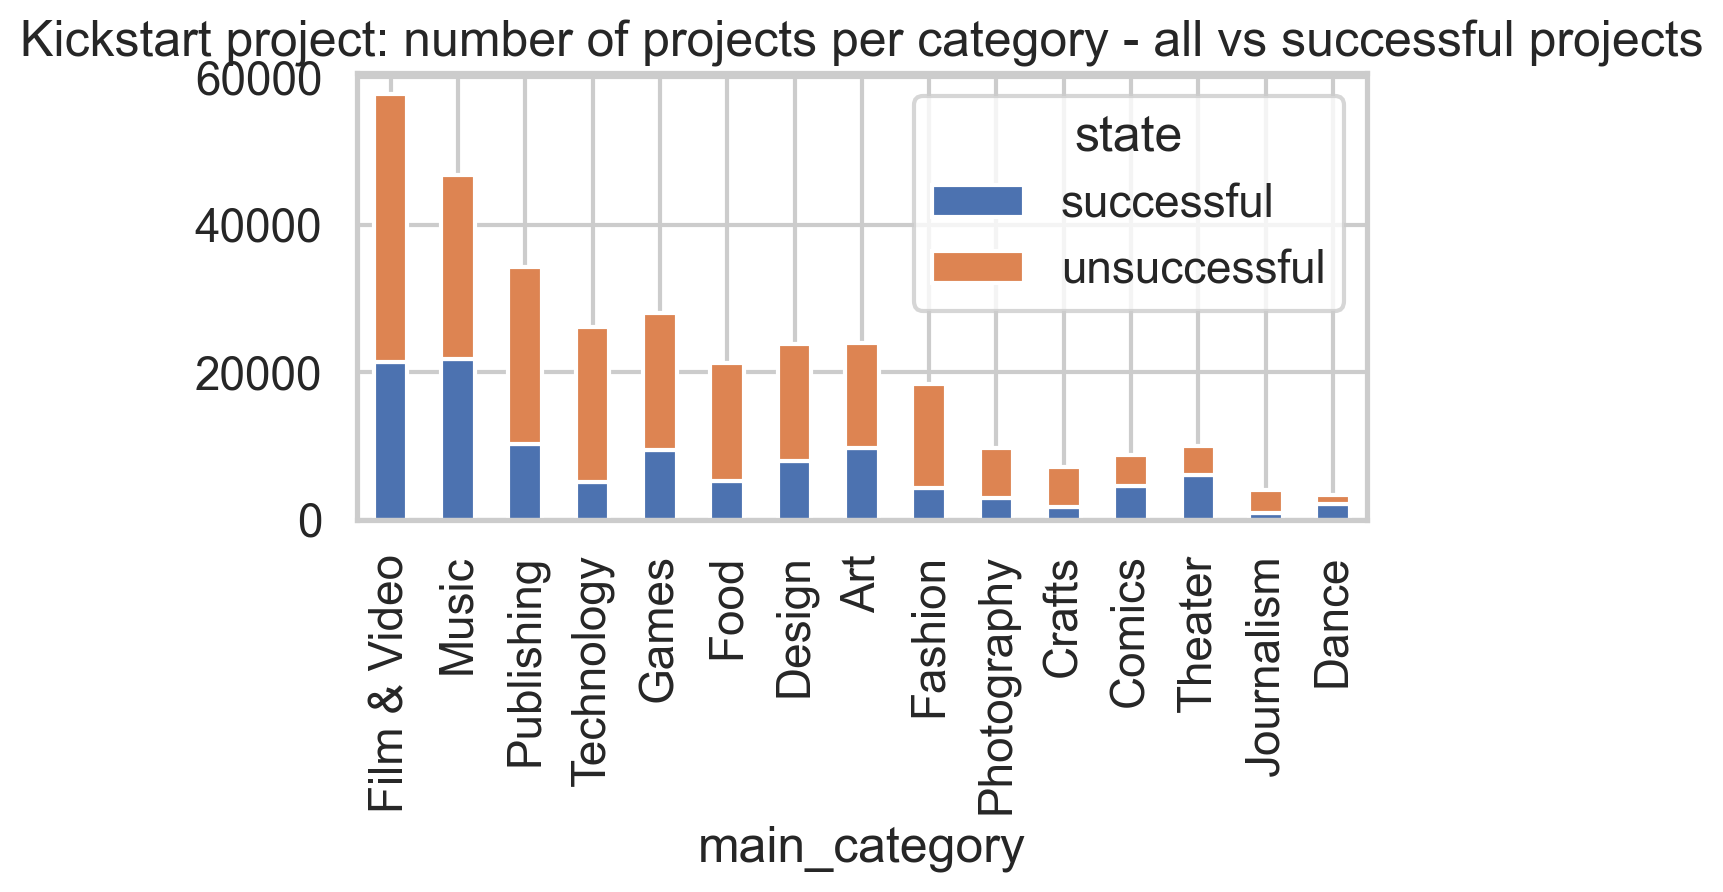

In [58]:
import numpy as np
kss = pd.DataFrame(ks_clean_state.groupby(["main_category", "state"]).name.count())
kss2 = kss.unstack().fillna(0)
kss2.columns = kss2.columns.droplevel()
successful = np.array(["successful"])
unsuccessful = np.setdiff1d(good_states, successful)
kss2["unsuccessful"] = kss2.drop(["successful"], axis=1).sum(axis=1)
kss3 = kss2.drop(unsuccessful, axis=1)
title = "Kickstart project: number of projects per category - all vs successful projects"
kss3.sort_values("unsuccessful", ascending=False).plot(kind="bar", stacked=True, title=title)


<Axes: ylabel='main_category'>

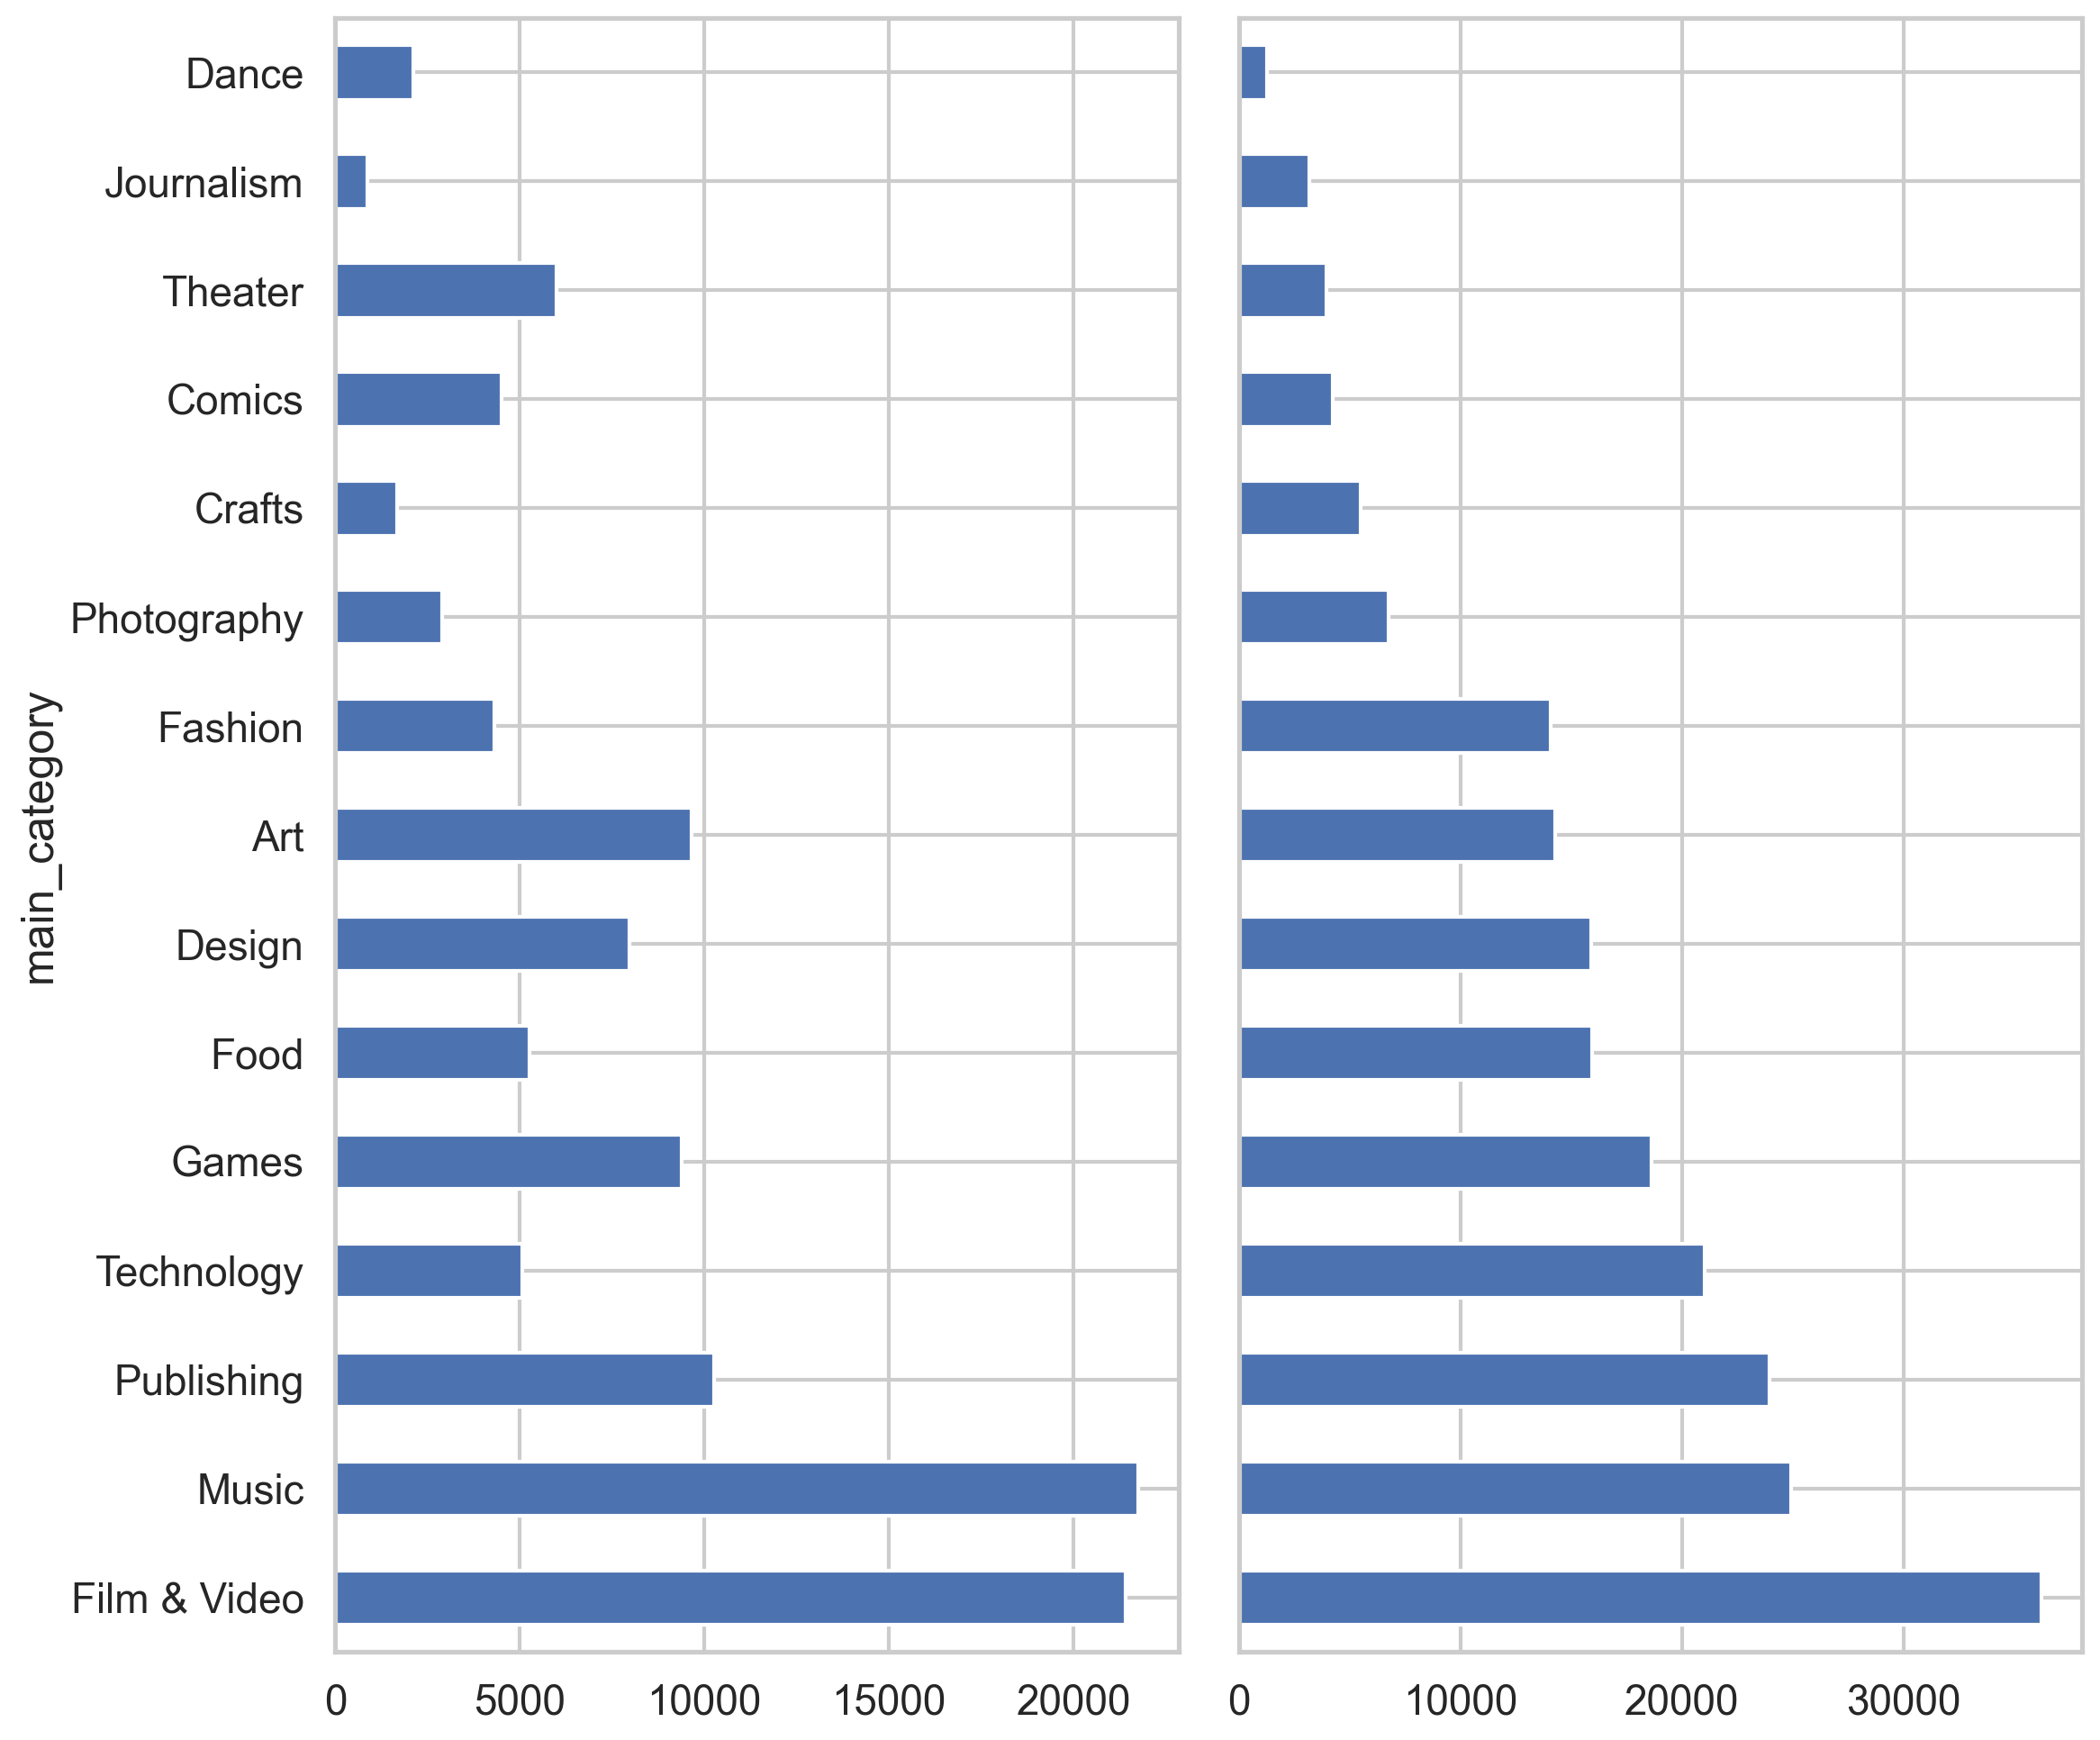

In [59]:
plt.rcParams["figure.autolayout"] = True
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,10), sharey=True)

kss3.sort_values("unsuccessful", ascending=False).successful.plot.barh(stacked=True, ax=ax1)
kss3.sort_values("unsuccessful", ascending=False).unsuccessful.plot.barh(stacked=True, ax=ax2)

### Making sure that the categories are actually distinct

We want to investigate if some categories are actually the same but the string is different because of a typo or extra whitespaces. We can use the Levenshtein distance, compute the distance for all the pairs, and look at the ones with minumum distance to make sure they are different.

In [ ]:
from Levenshtein import distance

words = ks.main_category.value_counts().index

similarities = {}
for w in words:
    for w2 in words:
        if w != w2:
            similarities[f"{w} <=> {w2}"] = distance(w, w2)
            
sorted(similarities.items(), key=lambda x: x[1])

In [ ]:

import itertools

similarities = {}
for w1, w2 in itertools.combinations(words, 2):
        similarities[f"{w1} <=> {w2}"] = distance(w1, w2)

sorted(similarities.items(), key=lambda item: item[1])

### Looking at backers -- pledged information

Prepping and plotting the data in a scatterplot to see if there are outliers, i.e., projects with an uncommon ratio of backers/pledges - like strong supporters (low number of backers, high pledged) or many small contributors.

<Axes: title={'center': 'Kickstarter projects scatterplot - Backers vs Pledge'}, xlabel='usd pledged', ylabel='backers'>

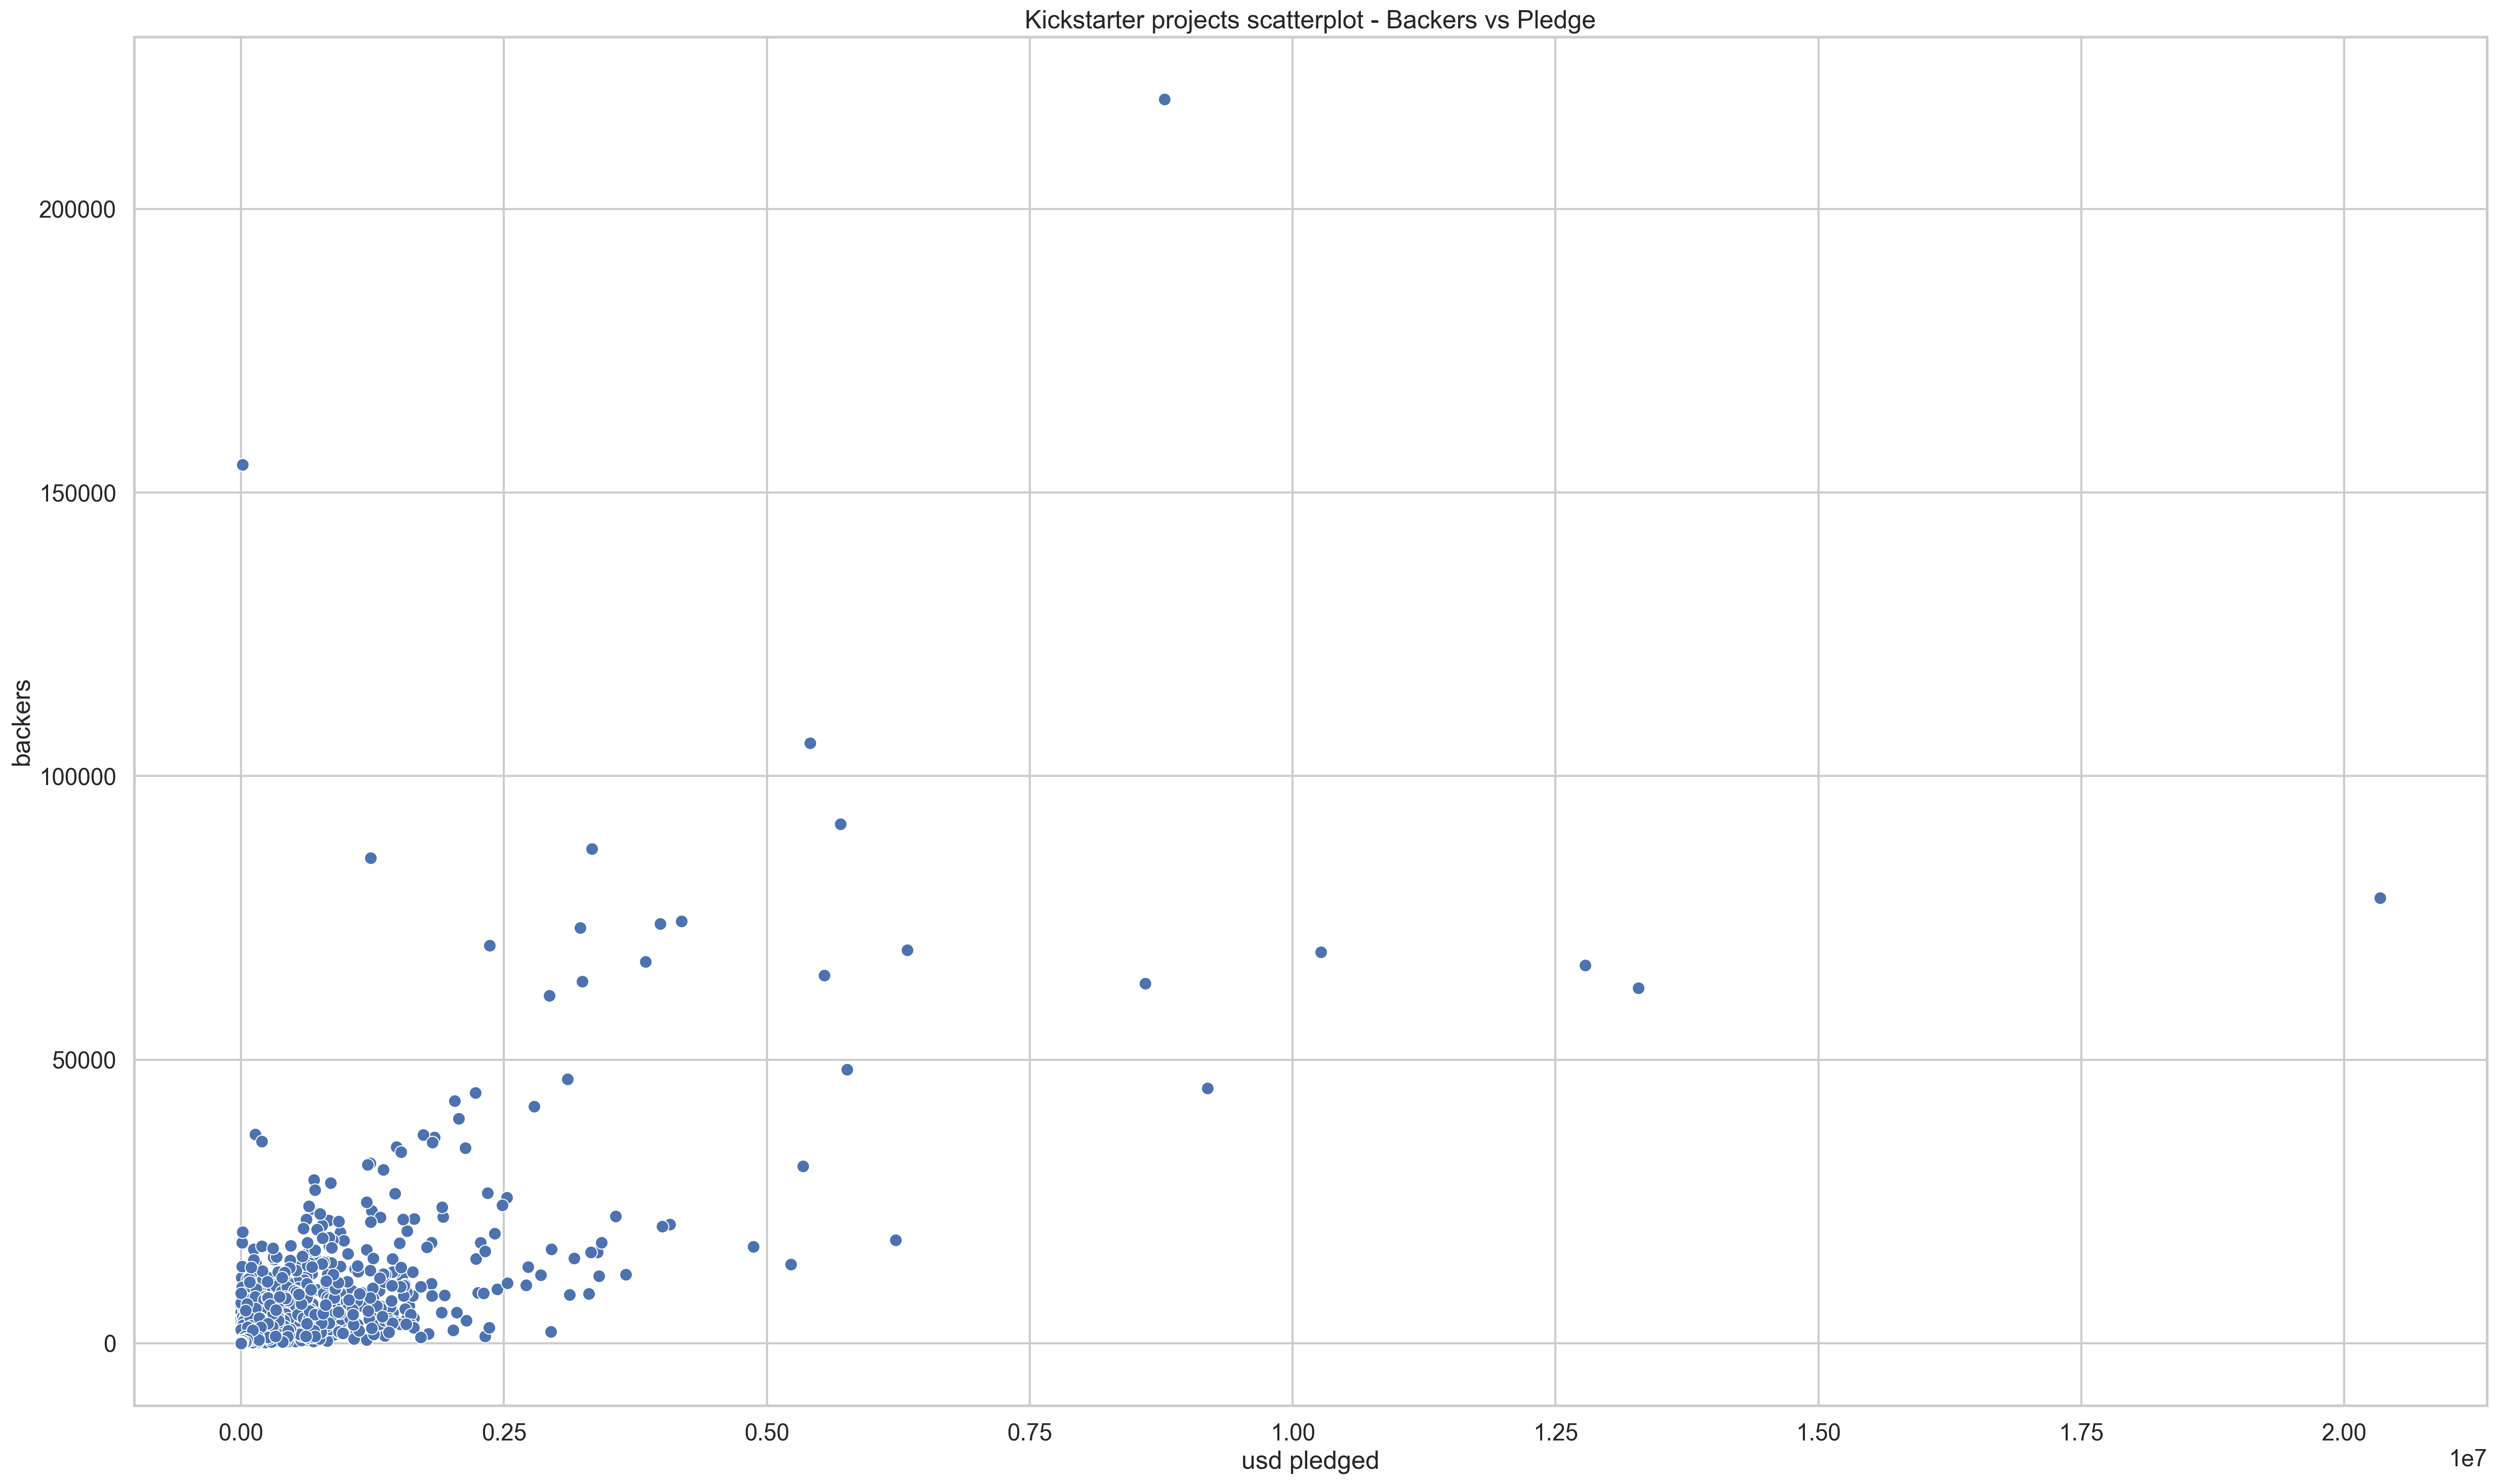

In [60]:
title = "Kickstarter projects scatterplot - Backers vs Pledge"
f, ax = plt.subplots(figsize=(25,15))
plt.title(title);

pledged = pd.Series(ks_clean_state["usd pledged"], dtype=float)
backers = pd.Series(ks_clean_state.backers, dtype=int)

sns.scatterplot(x=pledged, y=backers)

Defining thresholds and plotting the names for the projects above the thresholds

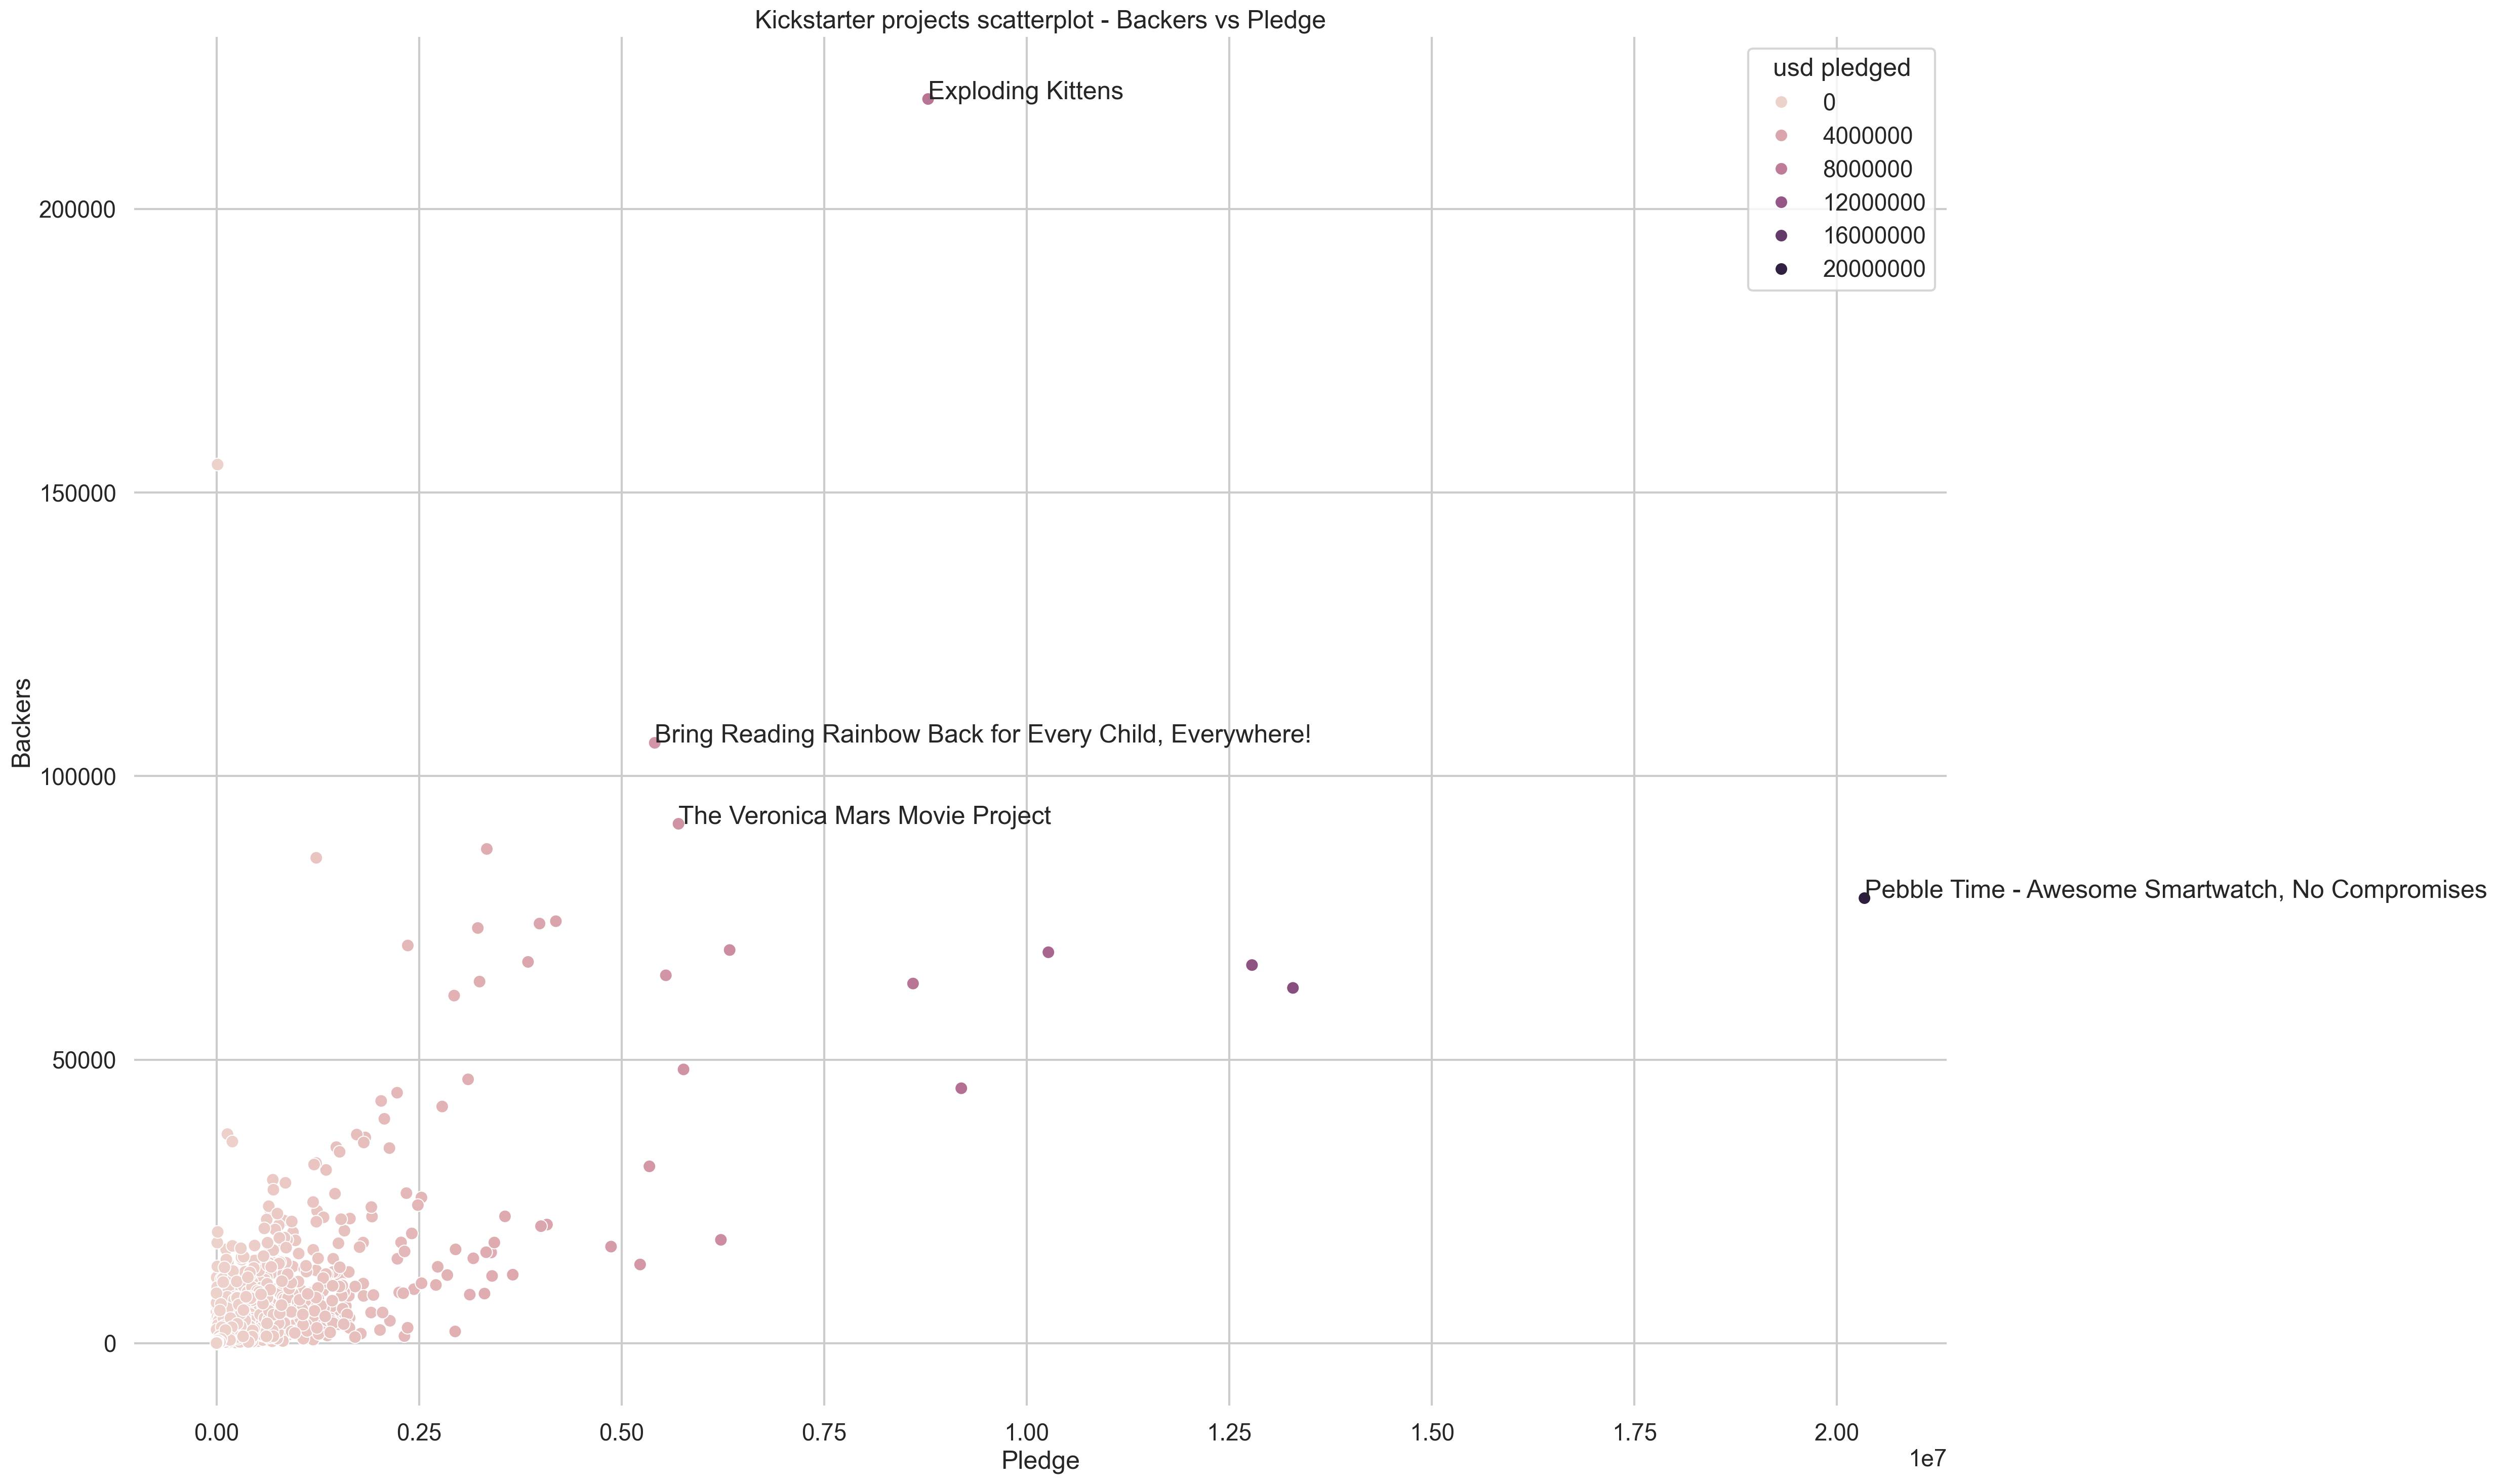

In [61]:
f, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(x=pledged, y=backers, hue=pledged)
sns.despine(left=True, bottom=True)

ax.set_xlabel("Pledge")
ax.set_ylabel("Backers")
plt.title("Kickstarter projects scatterplot - Backers vs Pledge")

threshold_pledge = 5000000
threshold_backer = 75000

for i in range(len(ks_clean_state)):
    if pledged.iloc[i] > threshold_pledge and backers.iloc[i] > threshold_backer:
        plt.annotate(ks_clean_state.name.iloc[i], (pledged.iloc[i], backers.iloc[i]))

In [62]:
header

NameError: name 'header' is not defined

### Standardization problem

It turns out that the pledged column represent money but the currency can be different, so what we're comparing in the graph above are apples and oranges. We need to convert to a common currency. The data is already there in the `usd pledged` column

## Boxplot

A boxplot is a very compact visualization of a distribution, particularly useful to compare distributions, as multiple ones can be displayed in the same boxplot visualization.

Seaborn provides a simple api to create boxplots, based on Pandas dataframes or simple lists.

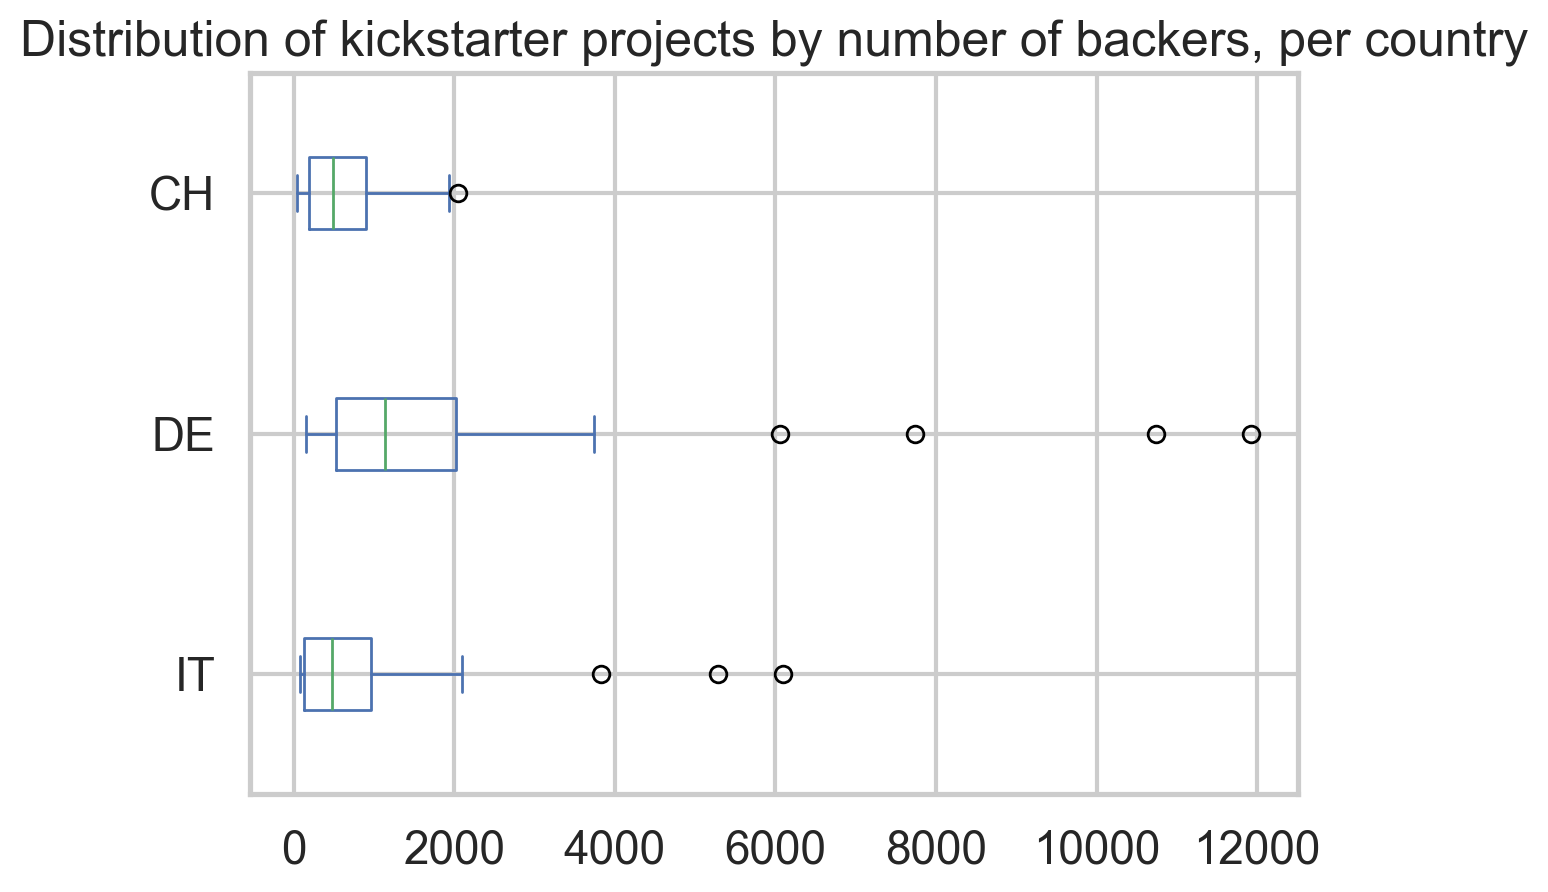

In [63]:
project_funded = pd.concat([backers, pledged, ks_clean_state.country, ks_clean_state.ID], axis=1)
project_funded = project_funded[(backers > 0) & (pledged > 50000)]
title = "Distribution of kickstarter projects by number of backers, per country"

pivot_country = project_funded.pivot(columns="country", values="backers")
pivot_country[["IT", "DE", "CH"]].fillna(0)

bp = pivot_country[["IT", "DE", "CH"]].plot.box(vert=False)
plt.title(title);

## Using ipywidgets

ipywidgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

They can be used to build interactive GUIs for your notebooks.

Documentation: https://ipywidgets.readthedocs.io/en/stable/index.html

### Create a widget

The interact function is a shortcut that avoid the explict creation of widgets

In [ ]:
from ipywidgets import widgets
from ipywidgets import interact

def f(x):
    print(x)

dropdown = interact(f, x=[1,2,3])

The interact function creates a widget based on the input, e.g., dropdown for list, slider for integer, checkbox for boolean, text area for string, etc.
You can also explicitly create the widget, which allows you to have more control over its properties (for example set the description text) and have more granular access to the event handler.

In [ ]:
d = widgets.Dropdown(description="category", options=[1,2,3])
display(d)

def f2(change):
    if change.name == "value":
        print(change.new)

d.observe(f2)

## Putting it all together: an interactive barchart of categories per country

Using seaborn and ipywidgets create a simple dashboard that shows the most frequent categories of kickstarter projects. The information is shown per country and the dashboard includes a dropdown to select the country. Making a selection on the dropdown triggers the update of the corresponding chart.

In [ ]:
plt.rcParams["figure.figsize"] = [16,4]


def plot_histogram_country(country):
    df = ks_clean_state[ks_clean_state.country == country]
    df.main_category.value_counts().plot.bar()
    plt.title(f"Kickstart project in {country}: count plot")
    plt.ylabel("Number of projects")
    plt.xlabel("Main category")


countries = ks_clean_state.country.value_counts().index.values
g = interact(plot_histogram_country, country=countries)